In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

Working with asthma data first

In [37]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/asthma_data.csv')
df.head()

,CensusTract,Asthma_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,10.9,10.4,11.4,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.8,8.4,9.3,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,10.3,10.0,10.6,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,9.4,9.1,9.8,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.9,9.4,10.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [38]:
np.mean(df['Asthma_prevalence'])

10.031229346127787

In [39]:
df.describe()

,CensusTract,Asthma_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
count,7.232300e+04,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000,72323.000000
mean,2.782414e+10,10.031229,9.564040,10.545895,4268.870152,8.435685,42.628724,0.487080,31.633315,0.435121,805.026266,0.320922,0.135485,0.788243,5.207031,10.766960
std,1.581841e+10,1.552261,1.458651,1.660424,1945.627564,1.639555,7.556406,0.391891,12.923435,0.149352,1633.554654,0.267894,0.272584,1.090026,21.189154,578.364188
min,1.001020e+09,5.600000,5.300000,5.900000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001110,0.001413,0.001841,0.000000
25%,1.212708e+10,9.000000,8.600000,9.400000,2910.000000,7.643253,39.264833,0.225445,25.229306,0.327229,74.947434,0.080630,0.026627,0.146012,0.205850,0.000000
50%,2.712775e+10,9.800000,9.400000,10.300000,4018.000000,8.524514,42.820344,0.394184,30.993896,0.423238,282.232215,0.256277,0.061314,0.358061,1.094986,0.000150
75%,4.103848e+10,10.800000,10.300000,11.400000,5335.000000,9.263109,45.615558,0.626212,37.059158,0.527007,792.766708,0.521043,0.132887,1.017288,3.253280,0.007894
max,5.604595e+10,20.600000,19.200000,22.400000,37452.000000,16.459907,75.941846,6.076340,1505.116697,4.060576,31282.365307,1.000000,7.794685,17.070987,434.079923,149200.758366


In [40]:
df.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df.set_index('CensusTract', inplace=True)
df.head()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,10.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,8.8,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,10.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,9.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


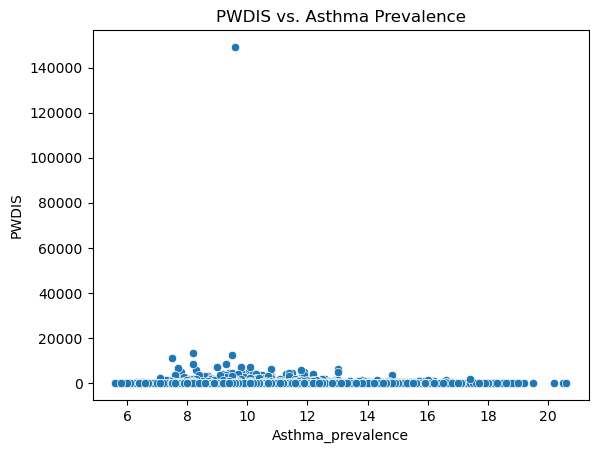

In [41]:
fig = sns.scatterplot(x=df['Asthma_prevalence'], y=df['PWDIS'])
_ = fig.set(title="PWDIS vs. Asthma Prevalence")

In [7]:
df['PWDIS'].idxmax()

46109940700

In [5]:
df.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/Asthma.csv')

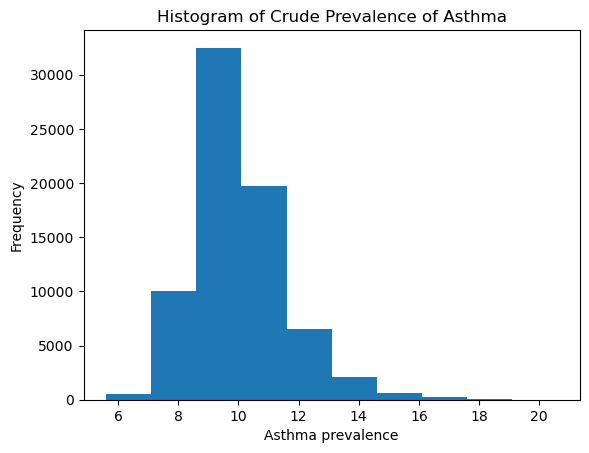

In [42]:
_ = plt.hist(df['Asthma_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Asthma prevalence')
_ = plt.title('Histogram of Crude Prevalence of Asthma')

Visualizing parameters to see any clear correlations.

In [43]:
df.corr()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Asthma_prevalence,1.000000,-0.028429,0.110788,-0.018982,-0.017102,-0.024781,-0.003949,0.281981,0.005500,0.127922,-0.037394,-0.000535
PM25,-0.028429,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,0.110788,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.018982,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.017102,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.024781,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.003949,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.281981,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,0.005500,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.127922,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


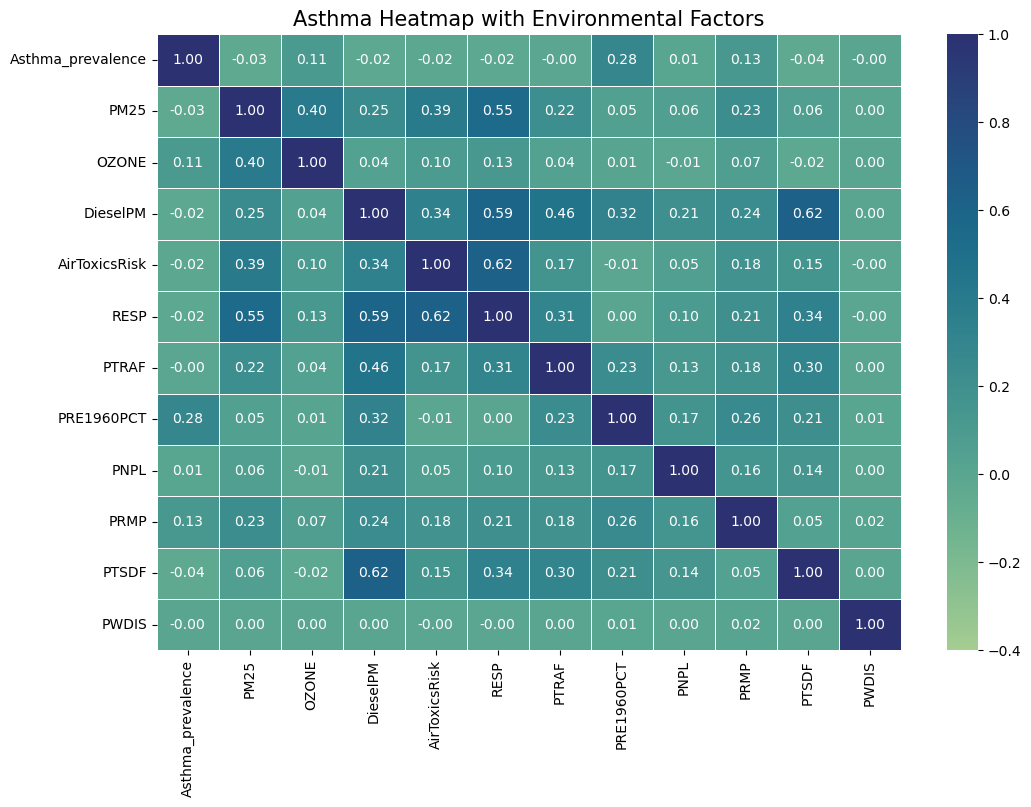

In [44]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Asthma Heatmap with Environmental Factors", fontsize =15)

Only OZONE, PRE1960PCT, and PRMP show a positive correlation to crude prevalence of asthma.

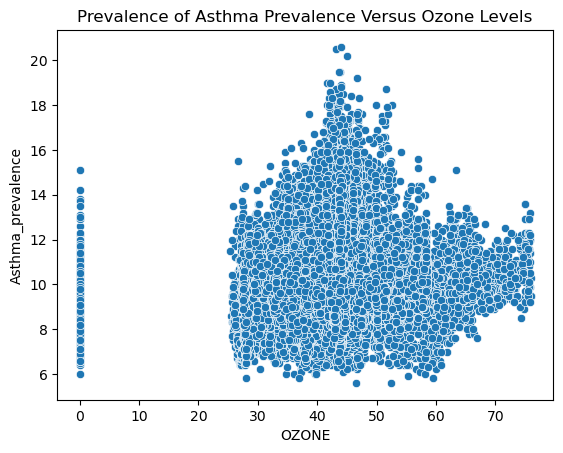

In [9]:
_ = sns.scatterplot(x='OZONE', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Prevalence Versus Ozone Levels')

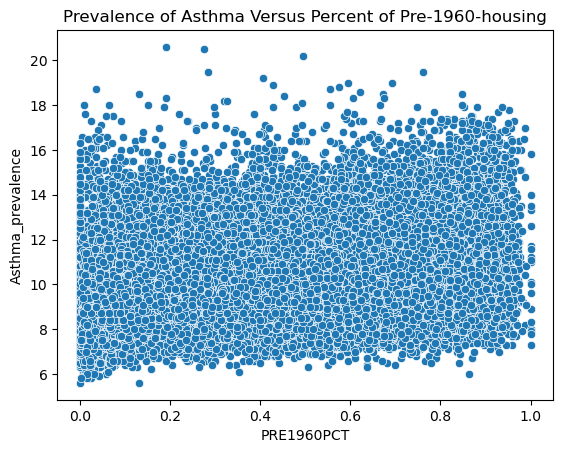

In [10]:
_ = sns.scatterplot(x='PRE1960PCT', y='Asthma_prevalence', data=df)
_ = _.set_title('Prevalence of Asthma Versus Percent of Pre-1960-housing')

No reasonable correlation.

Asthma prediction using multiple linear regression.

In [11]:
X = df.copy()
X = X.drop('Asthma_prevalence', axis=1)
y = df['Asthma_prevalence']
X.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [12]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [14]:
asthma_model = sm.OLS(y_train, X_train)
res_asthma = asthma_model.fit()

In [15]:
res_asthma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     708.1
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:09   Log-Likelihood:                -97306.
No. Observations:               54242   AIC:                         1.946e+05
Df Residuals:                   54230   BIC:                         1.947e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9439      0.042    211.571      0.000       8.861       9.027
PM25             -0.1379      0.005    -26.946      0.000      -0.148      -0.128
OZONE             0.0307      0.001     33.653      0.000       0.029       0.032
DieselPM         -0.5828      0.026    -22.400      0.000      -0.634      -0.532
AirToxicsRisk    -0.0001      0.001     -0.235      0.814      -0.001       0.001
RESP              1.3358      0.069     19.291      0.000       1.200       1.472
PTRAF         -2.784e-05   4.42e-06     -6.304      0.000   -3.65e-05   -1.92e-05
PRE1960PCT        1.9409      0.026     73.465      0.000       1.889       1.993
PNPL             -0.1792      0.024     -7.611      0.000      -0.225      -0.133
PRMP              0.1163      0.006     18.596      0.000       0.104       0.129
PTSDF            -0.0032      0.000     -8.160      0.000      -0.004      -0.002
PWDIS         -8.029e-06   9.46e-06     -0.848      0.396   -2.66e-05    1.05e-05
==============================================================================
Omnibus:                     9034.109   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19775.006
Skew:                           0.980   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df2 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//cancer_data.csv')
df2.head()

,CensusTract,Cancer_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.0,4.8,5.2,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,8.0,7.5,8.4,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,6.2,6.0,6.3,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.1,5.9,6.3,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.1,6.7,7.5,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [33]:
df2.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth', 'CensusTract'], axis=1, inplace=True)
df2.head()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


Dropping MeasureId because all of this health data is from CANCER and dropping columns that I will probably not need, the limits and total population for the health data. Also, changing index to CensusTract.

In [18]:
df2.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/cancer.csv')

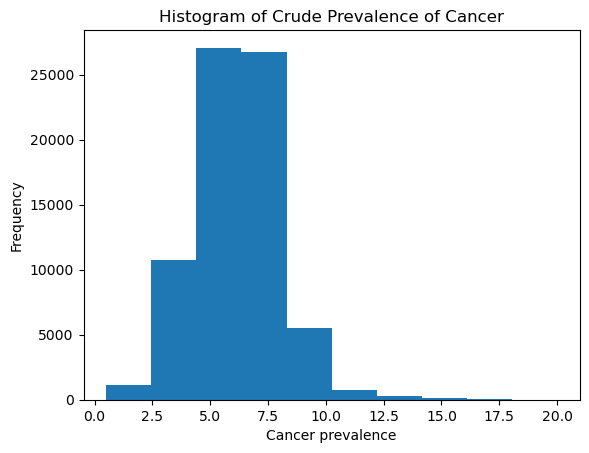

In [34]:
_ = plt.hist(df2['Cancer_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Cancer prevalence')
_ = plt.title('Histogram of Crude Prevalence of Cancer')

In [35]:
df2.corr()

,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
Cancer_prevalence,1.000000,-0.219611,-0.106416,-0.317580,-0.199981,-0.306677,-0.246381,-0.062947,-0.119024,-0.220501,-0.151194,-0.001731
PM25,-0.219611,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.106416,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.317580,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.199981,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.306677,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.246381,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,-0.062947,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.119024,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.220501,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


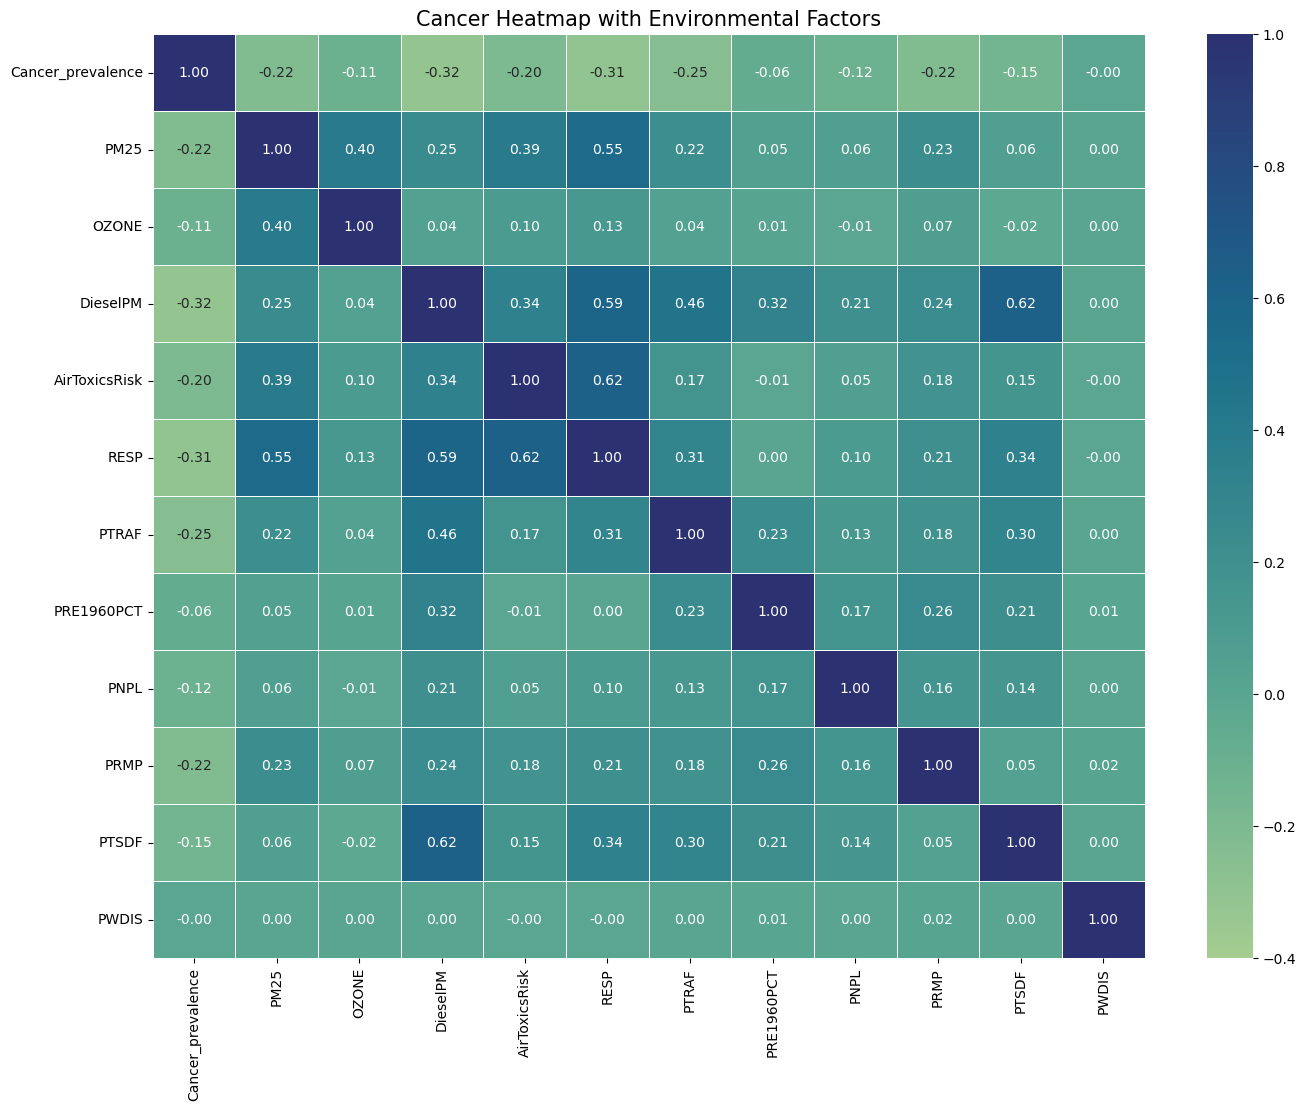

In [36]:
f, ax = plt.subplots(figsize=(16, 12))
_ = sns.heatmap(df2.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Cancer Heatmap with Environmental Factors", fontsize =15)

None of these environmental factors are positively correlated with cancer. 

Cancer prediction using multiple linear regression.

In [22]:
X = df2.copy()
X = X.drop('Cancer_prevalence', axis=1)


In [23]:
y = df2['Cancer_prevalence']
X.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [24]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [25]:
cancer_model = sm.OLS(y_train, X_train)
res_cancer = cancer_model.fit()

In [26]:
res_cancer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     946.5
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:11   Log-Likelihood:            -1.0543e+05
No. Observations:               54242   AIC:                         2.109e+05
Df Residuals:                   54230   BIC:                         2.110e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.3302      0.049    169.601      0.000       8.234       8.426
PM25             -0.0368      0.006     -6.180      0.000      -0.048      -0.025
OZONE            -0.0152      0.001    -14.385      0.000      -0.017      -0.013
DieselPM         -0.8961      0.030    -29.616      0.000      -0.955      -0.837
AirToxicsRisk    -0.0005      0.001     -0.688      0.492      -0.002       0.001
RESP             -1.4157      0.082    -17.216      0.000      -1.577      -1.255
PTRAF            -0.0001    5.1e-06    -24.223      0.000      -0.000      -0.000
PRE1960PCT        0.4011      0.031     13.053      0.000       0.341       0.461
PNPL             -0.3306      0.027    -12.179      0.000      -0.384      -0.277
PRMP             -0.2120      0.007    -29.381      0.000      -0.226      -0.198
PTSDF             0.0034      0.000      7.676      0.000       0.003       0.004
PWDIS          6.809e-06   1.09e-05      0.622      0.534   -1.46e-05    2.83e-05
==============================================================================
Omnibus:                    11269.727   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68152.493
Skew:                           0.865   Prob(JB):                         0.00
Kurtosis:                       8.212   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now kidney disease

In [28]:
df3 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//kidney_data.csv')
df3.head()

,CensusTract,Kidney_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.1,2.9,3.3,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,2.9,2.7,3.2,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.3,3.2,3.4,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.7,2.6,2.9,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.3,3.0,3.6,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [29]:
df3.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df3.set_index('CensusTract', inplace=True)
df3.head()

,Kidney_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.1,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,2.9,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.7,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.3,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [29]:
df3.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/kidney.csv')

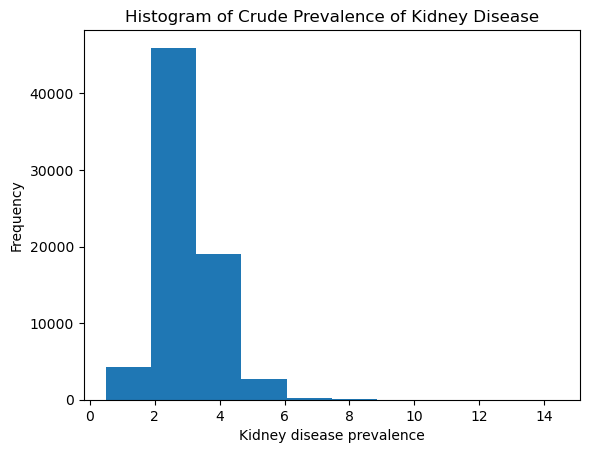

In [30]:
_ = plt.hist(df3['Kidney_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Kidney disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of Kidney Disease')

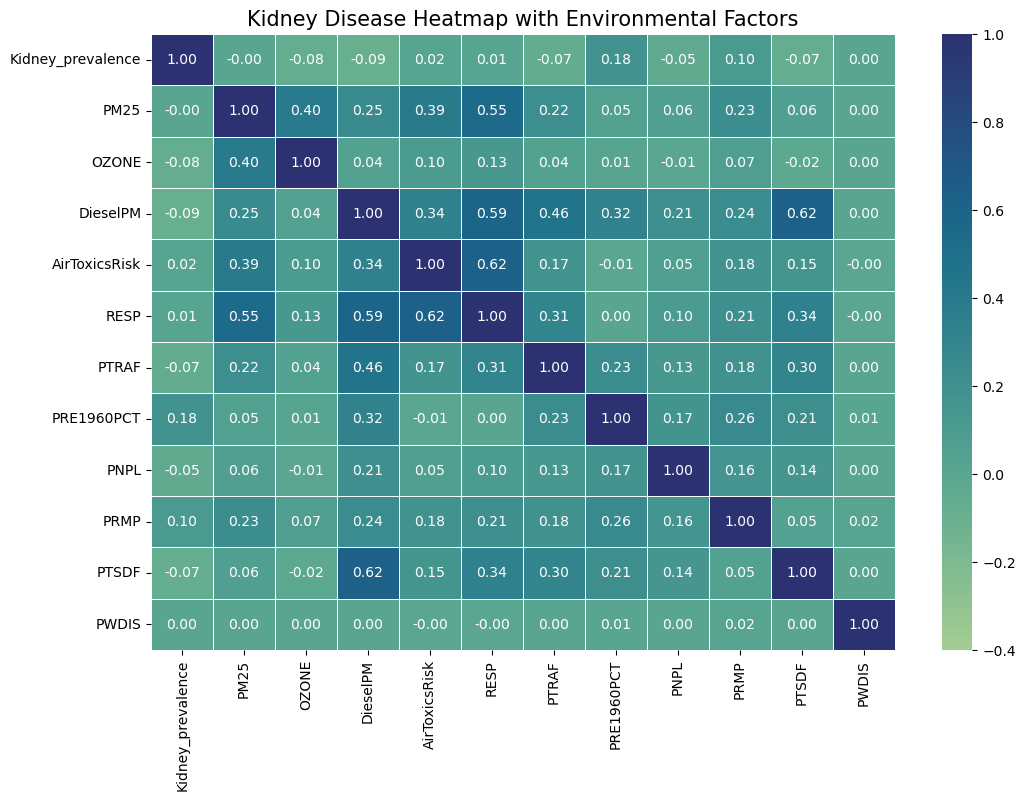

In [31]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df3.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Kidney Disease Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT, and PRMP show a positive correlation of more than .02 to crude prevalence of Kidney problems.

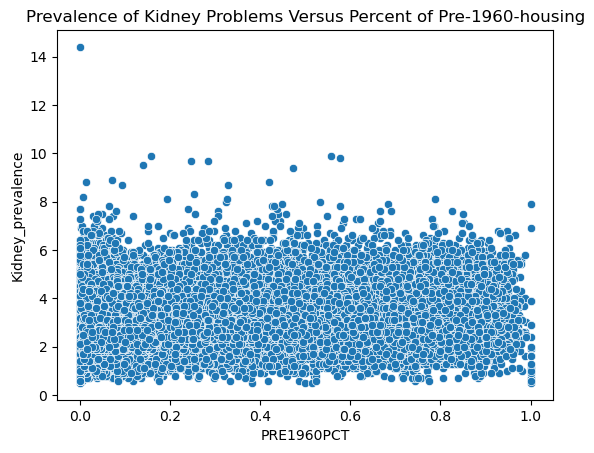

In [32]:
 _ = sns.scatterplot(x='PRE1960PCT', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus Percent of Pre-1960-housing')

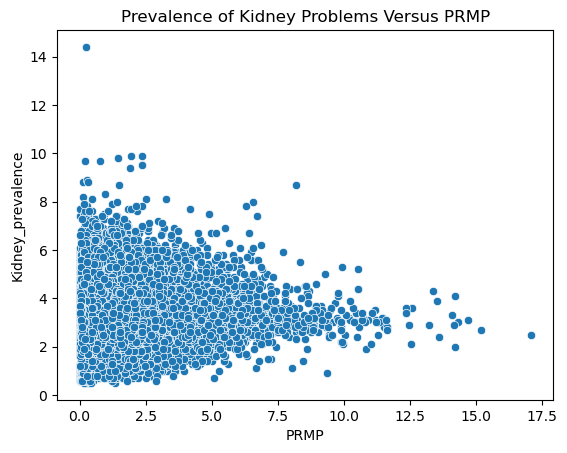

In [33]:
_ = sns.scatterplot(x='PRMP', y='Kidney_prevalence', data=df3)
_ = _.set_title('Prevalence of Kidney Problems Versus PRMP')

No reasonable correlation

Kidney disease prediction using multiple linear regression.

In [34]:
X = df3.copy()
X = X.drop('Kidney_prevalence', axis=1)
y = df3['Kidney_prevalence']

In [35]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [36]:
kidney_model = sm.OLS(y_train, X_train)
res_kidney = kidney_model.fit()

In [37]:
res_kidney.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     522.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:13   Log-Likelihood:                -65572.
No. Observations:               54242   AIC:                         1.312e+05
Df Residuals:                   54230   BIC:                         1.313e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9863      0.023    127.390      0.000       2.940       3.032
PM25             -0.0128      0.003     -4.513      0.000      -0.018      -0.007
OZONE            -0.0098      0.001    -19.323      0.000      -0.011      -0.009
DieselPM         -0.5443      0.015    -37.280      0.000      -0.573      -0.516
AirToxicsRisk     0.0004      0.000      1.008      0.314      -0.000       0.001
RESP              1.1093      0.040     28.026      0.000       1.032       1.187
PTRAF         -3.678e-05   2.44e-06    -15.075      0.000   -4.16e-05    -3.2e-05
PRE1960PCT        0.8455      0.015     57.448      0.000       0.817       0.874
PNPL             -0.1976      0.013    -15.127      0.000      -0.223      -0.172
PRMP              0.0686      0.003     19.671      0.000       0.062       0.075
PTSDF            -0.0004      0.000     -1.992      0.046      -0.001   -6.85e-06
PWDIS          2.148e-06   5.27e-06      0.408      0.684   -8.18e-06    1.25e-05
==============================================================================
Omnibus:                    12435.643   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46391.963
Skew:                           1.115   Prob(JB):                         0.00
Kurtosis:                       6.943   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now COPD

In [10]:
df4 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//copd_data.csv')
df4.head()

,CensusTract,COPD_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,7.6,6.8,8.5,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.2,6.0,8.6,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,9.2,8.5,9.9,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,7.8,7.1,8.6,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.8,8.6,11.2,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [11]:
df4.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df4.set_index('CensusTract', inplace=True)
df4.head()

,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


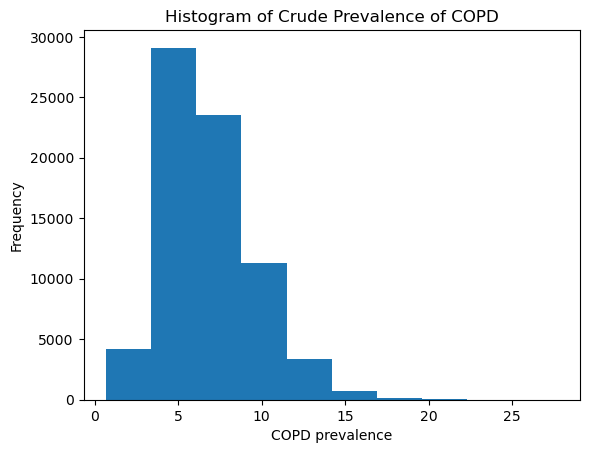

In [12]:
_ = plt.hist(df4['COPD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('COPD prevalence')
_ = plt.title('Histogram of Crude Prevalence of COPD')

In [13]:
df4.corr()

,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
COPD_prevalence,1.000000,-0.039750,-0.078967,-0.256896,-0.054721,-0.097198,-0.180631,0.106012,-0.095000,0.031072,-0.147708,-0.002698
PM25,-0.039750,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.078967,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.256896,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.054721,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.097198,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.180631,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.106012,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.095000,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,0.031072,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


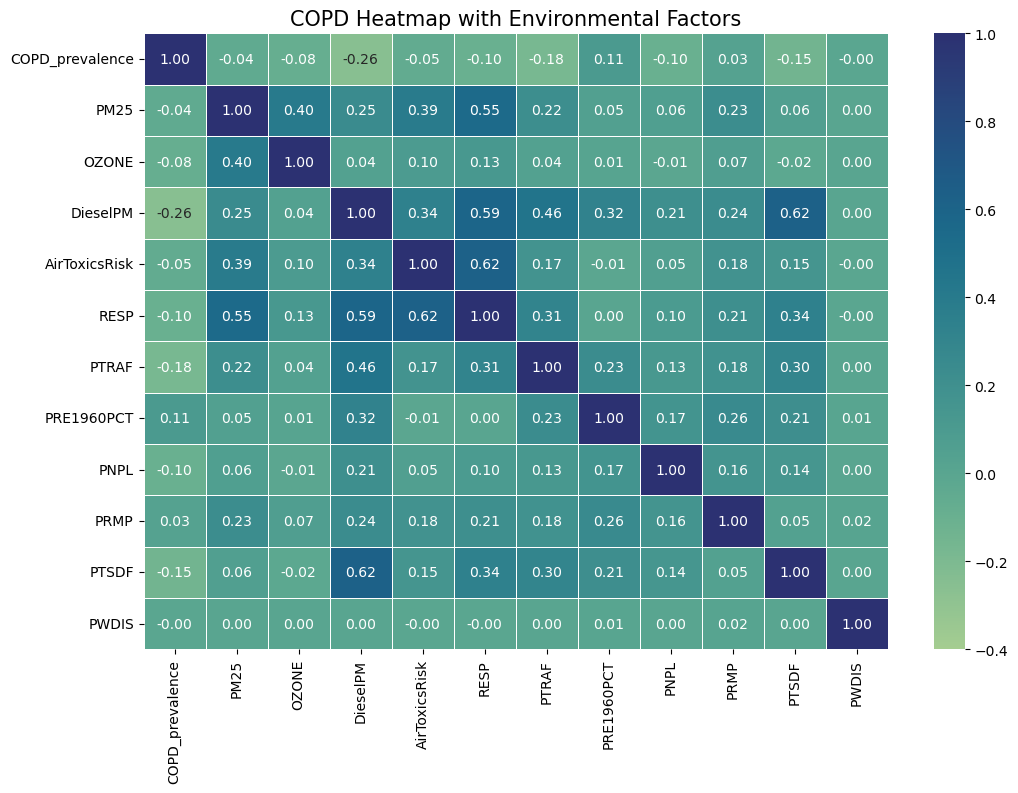

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df4.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("COPD Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT and PRMP show a positive correlation to crude prevalence of COPD.

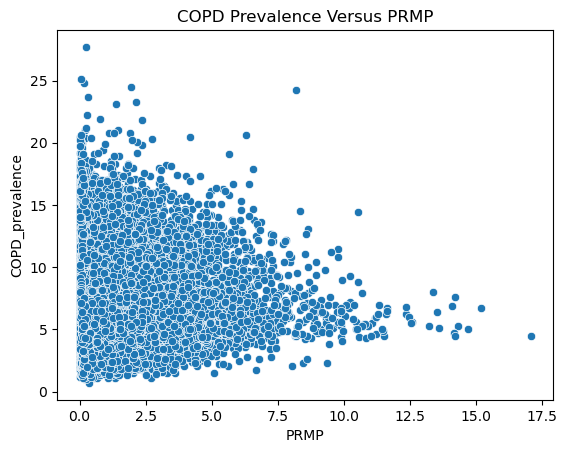

In [43]:
_ = sns.scatterplot(x='PRMP', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus PRMP')

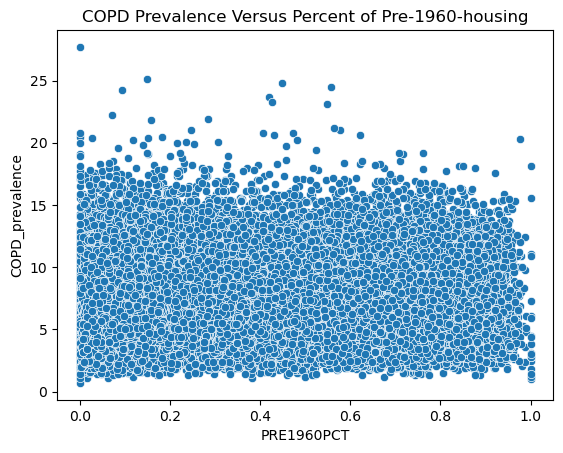

In [44]:
_ = sns.scatterplot(x='PRE1960PCT', y='COPD_prevalence', data=df4)
_ = _.set_title('COPD Prevalence Versus Percent of Pre-1960-housing')

No reasonable correlations for COPD prevalence.

COPD prediction using multiple linear regression.

In [45]:
X = df4.copy()
X = X.drop('COPD_prevalence', axis=1)
y = df4['COPD_prevalence']

In [46]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [47]:
COPD_model = sm.OLS(y_train, X_train)
res_COPD = COPD_model.fit()

In [48]:
res_COPD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     828.1
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:14   Log-Likelihood:            -1.2523e+05
No. Observations:               54242   AIC:                         2.505e+05
Df Residuals:                   54230   BIC:                         2.506e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3606      0.071    104.358      0.000       7.222       7.499
PM25              0.0090      0.009      1.052      0.293      -0.008       0.026
OZONE            -0.0297      0.002    -19.520      0.000      -0.033      -0.027
DieselPM         -2.6270      0.044    -60.028      0.000      -2.713      -2.541
AirToxicsRisk    -0.0017      0.001     -1.436      0.151      -0.004       0.001
RESP              3.0100      0.120     25.020      0.000       2.774       3.246
PTRAF            -0.0002   7.41e-06    -26.296      0.000      -0.000      -0.000
PRE1960PCT        2.4813      0.044     56.181      0.000       2.395       2.568
PNPL             -0.6875      0.039    -17.456      0.000      -0.765      -0.610
PRMP              0.1557      0.010     14.962      0.000       0.135       0.176
PTSDF             0.0028      0.001      4.349      0.000       0.002       0.004
PWDIS          -7.07e-06   1.58e-05     -0.448      0.654    -3.8e-05    2.39e-05
==============================================================================
Omnibus:                     8665.283   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17927.473
Skew:                           0.966   Prob(JB):                         0.00
Kurtosis:                       5.050   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the R2 value, these features do not predict COPD well.

In [49]:
df4.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/COPD.csv')

Now CHD

In [15]:
df5 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//CHD_data.csv')
df5.head()

,CensusTract,CHD_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,5.9,5.5,6.3,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.1,6.4,7.9,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,7.3,7.0,7.7,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,6.4,6.0,6.8,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,7.9,7.2,8.6,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [16]:
df5.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df5.set_index('CensusTract', inplace=True)
df5.head()

,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,5.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.1,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,7.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,6.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,7.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


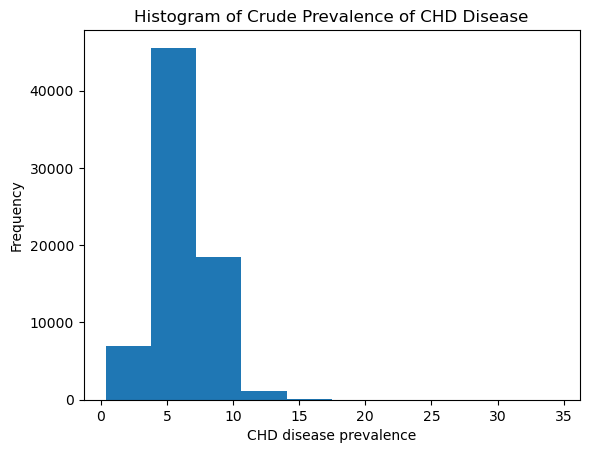

In [17]:
_ = plt.hist(df5['CHD_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('CHD disease prevalence')
_ = plt.title('Histogram of Crude Prevalence of CHD Disease')

Visualizing parameters to see any clear correlations.

In [18]:
df5.corr()

,CHD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CHD_prevalence,1.000000,-0.093471,-0.112446,-0.274925,-0.089541,-0.153073,-0.193048,0.082332,-0.104218,-0.021182,-0.144604,0.001107
PM25,-0.093471,1.000000,0.401830,0.248008,0.392767,0.545526,0.220669,0.052940,0.062338,0.226179,0.057516,0.003380
OZONE,-0.112446,0.401830,1.000000,0.039513,0.096450,0.128479,0.037795,0.011966,-0.008894,0.065721,-0.021075,0.000751
DieselPM,-0.274925,0.248008,0.039513,1.000000,0.343077,0.585017,0.456339,0.324646,0.207096,0.238852,0.617922,0.004680
AirToxicsRisk,-0.089541,0.392767,0.096450,0.343077,1.000000,0.619348,0.169065,-0.011072,0.054519,0.178917,0.154636,-0.001279
RESP,-0.153073,0.545526,0.128479,0.585017,0.619348,1.000000,0.314657,0.002878,0.101524,0.210057,0.337806,-0.001408
PTRAF,-0.193048,0.220669,0.037795,0.456339,0.169065,0.314657,1.000000,0.234633,0.129830,0.183744,0.303923,0.003891
PRE1960PCT,0.082332,0.052940,0.011966,0.324646,-0.011072,0.002878,0.234633,1.000000,0.167739,0.255859,0.214053,0.007079
PNPL,-0.104218,0.062338,-0.008894,0.207096,0.054519,0.101524,0.129830,0.167739,1.000000,0.160936,0.142546,0.004078
PRMP,-0.021182,0.226179,0.065721,0.238852,0.178917,0.210057,0.183744,0.255859,0.160936,1.000000,0.045509,0.018822


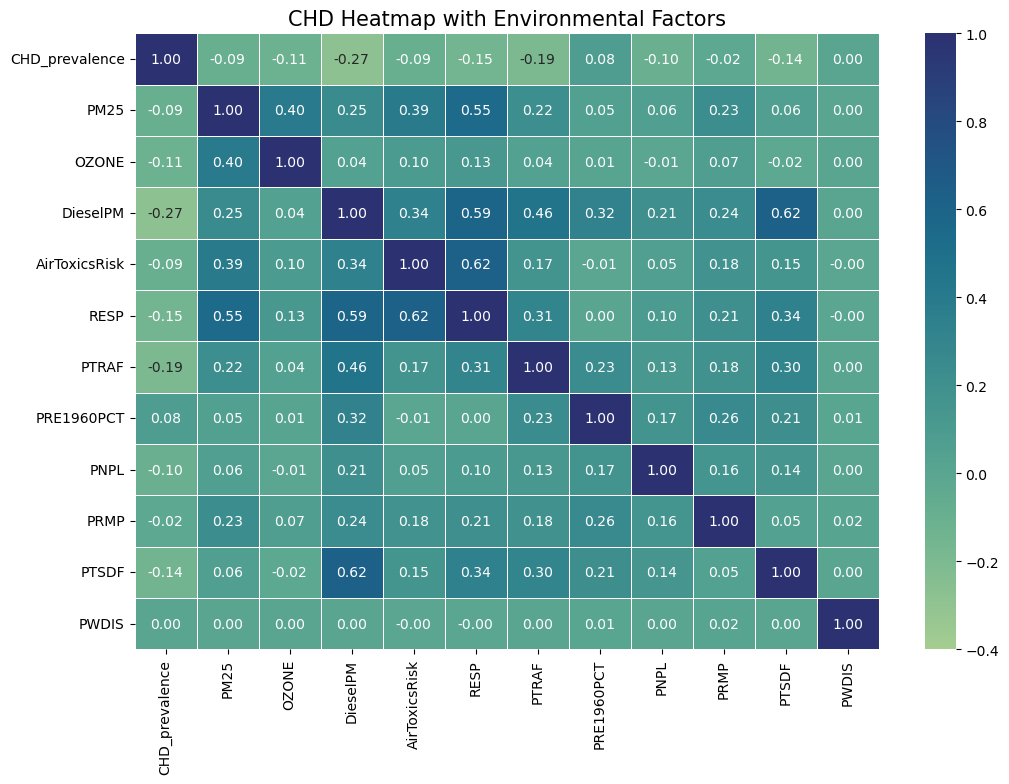

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df5.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("CHD Heatmap with Environmental Factors", fontsize =15)

Only PRE1960PCT shows a positive correlation to crude prevalence of CHD.

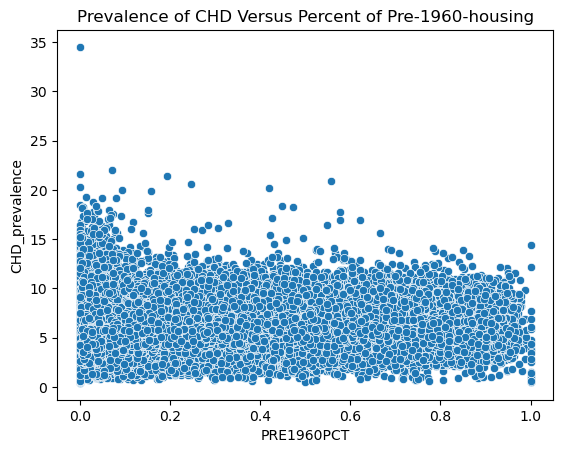

In [55]:
_ = sns.scatterplot(x='PRE1960PCT', y='CHD_prevalence', data=df5)
_ = _.set_title('Prevalence of CHD Versus Percent of Pre-1960-housing')

No reasonable correlation

CHD prediction using multiple linear regression.

In [56]:
X = df5.copy()
X = X.drop('CHD_prevalence', axis=1)
y = df5['CHD_prevalence']

In [57]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [58]:
CHD_model = sm.OLS(y_train, X_train)
res_CHD = CHD_model.fit()

In [59]:
res_CHD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     808.0
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:15   Log-Likelihood:            -1.0997e+05
No. Observations:               54242   AIC:                         2.200e+05
Df Residuals:                   54230   BIC:                         2.201e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3397      0.053    137.394      0.000       7.235       7.444
PM25             -0.0091      0.006     -1.418      0.156      -0.022       0.003
OZONE            -0.0276      0.001    -23.987      0.000      -0.030      -0.025
DieselPM         -1.8720      0.033    -57.090      0.000      -1.936      -1.808
AirToxicsRisk -8.569e-05      0.001     -0.119      0.905      -0.001       0.001
RESP              1.3679      0.087     15.786      0.000       1.198       1.538
PTRAF            -0.0001   5.53e-06    -25.189      0.000      -0.000      -0.000
PRE1960PCT        1.6969      0.033     50.813      0.000       1.631       1.762
PNPL             -0.5152      0.029    -17.469      0.000      -0.573      -0.457
PRMP              0.0521      0.008      6.633      0.000       0.037       0.068
PTSDF             0.0040      0.000      8.122      0.000       0.003       0.005
PWDIS          7.814e-06   1.19e-05      0.656      0.512   -1.55e-05    3.12e-05
==============================================================================
Omnibus:                    11367.823   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56512.877
Skew:                           0.932   Prob(JB):                         0.00
Kurtosis:                       7.640   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
df5.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/CHD.csv')

In [24]:
df6 = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim//stroke_data.csv')
df6.head()

,CensusTract,Stroke_prevalence,Low_Confidence_Limit,High_Confidence_Limit,TotalPopHealth,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.7,3.4,4.1,2170,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,3.0,2.6,3.5,4386,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.8,3.5,4.0,2894,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.9,2.7,3.2,8011,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.7,3.3,4.2,4302,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [25]:
df6.drop(['Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopHealth'], axis=1, inplace=True)
df6.set_index('CensusTract', inplace=True)
df6.head()

,Stroke_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.7,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,3.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.8,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.9,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.7,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


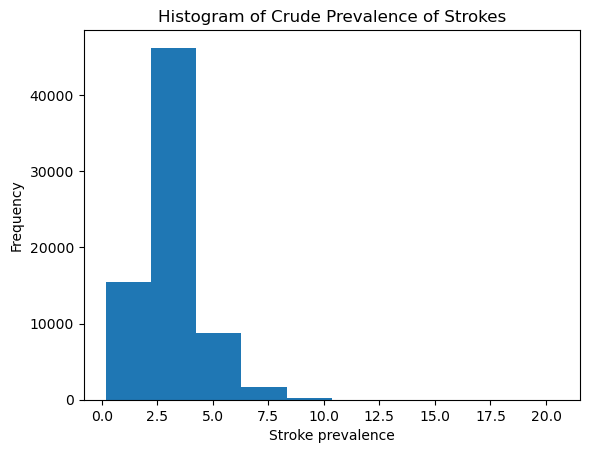

In [26]:
_ = plt.hist(df6['Stroke_prevalence'])
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Stroke prevalence')
_ = plt.title('Histogram of Crude Prevalence of Strokes')

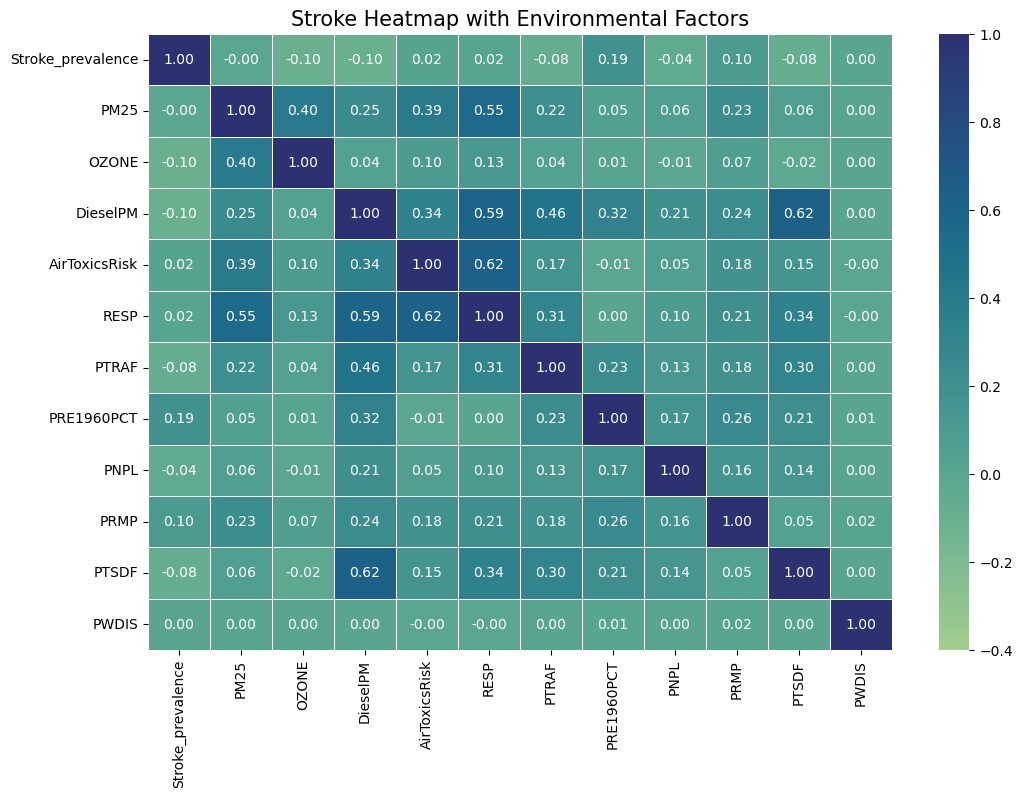

In [27]:
f, ax = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(df6.corr(), vmin=-.4, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
_ = plt.title("Stroke Heatmap with Environmental Factors", fontsize =15)

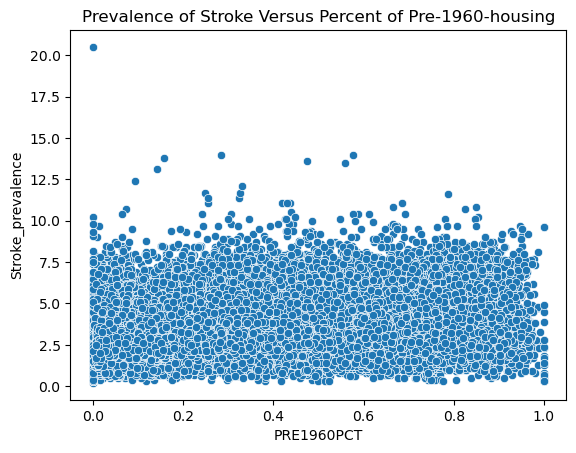

In [65]:
_ = sns.scatterplot(x='PRE1960PCT', y='Stroke_prevalence', data=df6)
_ = _.set_title('Prevalence of Stroke Versus Percent of Pre-1960-housing')

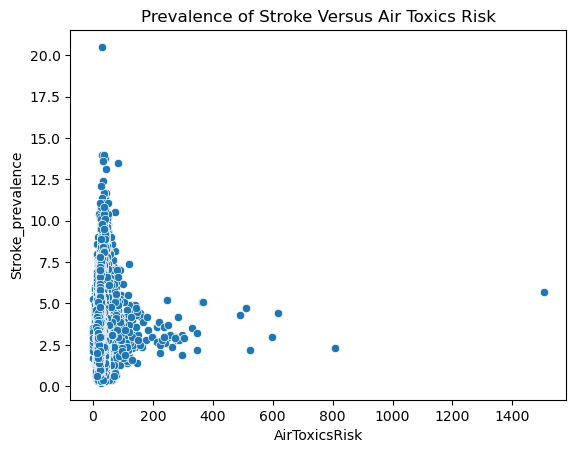

In [66]:
_ = sns.scatterplot(x='AirToxicsRisk', y='Stroke_prevalence', data=df6)
_ = _.set_title('Prevalence of Stroke Versus Air Toxics Risk')

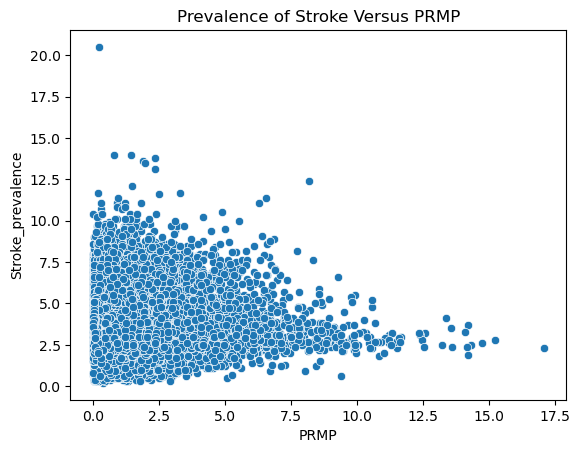

In [67]:
_ = sns.scatterplot(x='PRMP', y='Stroke_prevalence', data=df6)
_ = _.set_title('Prevalence of Stroke Versus PRMP')

In [68]:
X = df6.copy()
X = X.drop('Stroke_prevalence', axis=1)
y = df6['Stroke_prevalence']

In [69]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54242, 12), (18081, 12), (54242, 1), (18081, 1))

In [70]:
Stroke_model = sm.OLS(y_train, X_train)
res_stroke = Stroke_model.fit()

In [71]:
res_stroke.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     601.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:17   Log-Likelihood:                -84657.
No. Observations:               54242   AIC:                         1.693e+05
Df Residuals:                   54230   BIC:                         1.694e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3074      0.033     99.270      0.000       3.242       3.373
PM25             -0.0160      0.004     -3.951      0.000      -0.024      -0.008
OZONE            -0.0187      0.001    -25.870      0.000      -0.020      -0.017
DieselPM         -0.7779      0.021    -37.891      0.000      -0.818      -0.738
AirToxicsRisk     0.0009      0.000      1.953      0.051   -3.34e-06       0.002
RESP              1.7043      0.055     31.047      0.000       1.597       1.812
PTRAF         -6.028e-05   3.44e-06    -17.545      0.000    -6.7e-05   -5.35e-05
PRE1960PCT        1.2839      0.021     61.498      0.000       1.243       1.325
PNPL             -0.2533      0.019    -13.480      0.000      -0.290      -0.216
PRMP              0.0846      0.005     17.366      0.000       0.075       0.094
PTSDF            -0.0018      0.000     -5.794      0.000      -0.002      -0.001
PWDIS          1.866e-06   7.51e-06      0.248      0.804   -1.29e-05    1.66e-05
==============================================================================
Omnibus:                    17476.869   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89326.697
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       8.552   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
df6.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/stroke.csv')

In [23]:
df['Stroke_prevalence'] = df6['Stroke_prevalence']

In [24]:
df['CHD_prevalence'] = df5['CHD_prevalence']

In [25]:
df['COPD_prevalence'] = df4['COPD_prevalence']

In [26]:
df['Cancer_prevalence'] = df2['Cancer_prevalence']
df['Kidney_prevalence'] = df3['Kidney_prevalence']

In [27]:
df.head()

,Asthma_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Stroke_prevalence,CHD_prevalence,COPD_prevalence,Cancer_prevalence,Kidney_prevalence
CensusTract,,,,,,,,,,,,,,,,,
1001020200,10.9,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00,3.7,5.9,7.6,NaN,3.1
1001020400,8.8,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00,3.0,7.1,7.2,NaN,2.9
1001021000,10.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04,3.8,7.3,9.2,NaN,3.3
1003010905,9.4,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04,2.9,6.4,7.8,NaN,2.7
1003010906,9.9,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07,3.7,7.9,9.8,NaN,3.3


In [3]:
df = df.reset_index()

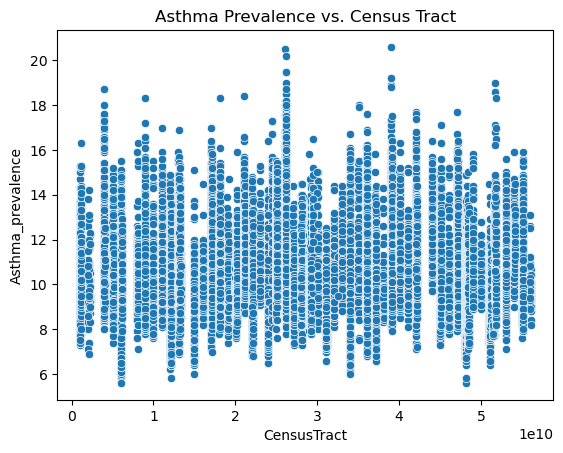

In [5]:
fig = sns.scatterplot(x=df['CensusTract'], y=df['Asthma_prevalence'])
_ = fig.set(title="Asthma Prevalence vs. Census Tract")

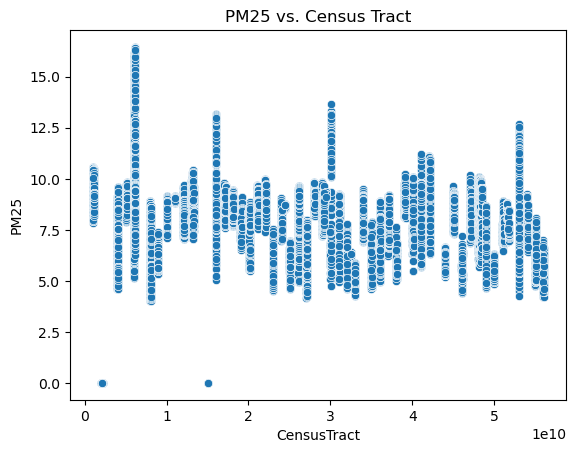

In [7]:
fig = sns.scatterplot(x=df["CensusTract"], y=df["PM25"])
_ = fig.set(title="PM25 vs. Census Tract")

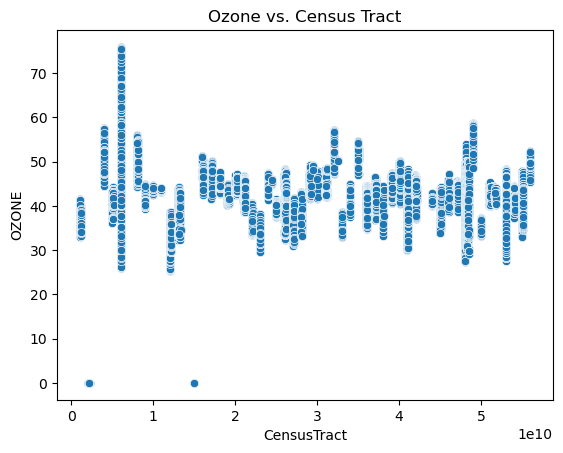

In [8]:
fig = sns.scatterplot(x=df["CensusTract"], y=df["OZONE"])
_ = fig.set(title="Ozone vs. Census Tract")

## None of these diseases can be predicted by multiple linear regression with the environmental factors. All of the R<sup>2</sup> values are very low.